# Step by Step Pipeline Debugging

Here I will debug the split migration model

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
import json
sys.path.append("/sietch_colab/akapoor/Demographic_Inference/")

In [2]:
experiment_config_filepath = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'

## Step 1: Simulation

In [3]:
from snakemake_scripts.single_simulation import main

In [4]:
sim_directory = '/sietch_colab/akapoor/Demographic_Inference/sims'
sim_number = 0

In [7]:
main(experiment_config_filepath, sim_directory, sim_number)

BEGINNING THE PROCESS OF SIMULATING THE CHROMOSOME


Let's examine the contents

In [6]:
with open(f'/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/sampled_params_{sim_number}.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [7]:
sampled_params

{'N0': 8842,
 'N1': 7247,
 'N2': 6937,
 'm12': 0.00035523875170101043,
 'm21': 0.00029072017959594495,
 't_split': 1582}

## Step 2: Genome Window VCFs

In [8]:
from snakemake_scripts.obtain_genome_vcfs import main as main_genome_vcf

In [11]:
#tree_sequence_file, experiment_config_filepath, genome_sim_directory, window_number, sim_number

tree_sequence_file = f'/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/ts_sim_{sim_number}.trees'
genome_sim_directory = '/sietch_colab/akapoor/Demographic_Inference/genome_windows_test'

for window_number in tqdm(range(100)):
    main_genome_vcf(tree_sequence_file, experiment_config_filepath, genome_sim_directory, window_number, sim_number)


100%|██████████| 100/100 [00:59<00:00,  1.67it/s]


## Step 3: LD Stats

In [23]:
# ld_stat_creation(vcf_filepath, flat_map_path, pop_file_path, sim_directory, sim_number, window_number)

In [9]:
from snakemake_scripts.ld_stats import ld_stat_creation

In [9]:
sim_directory = '/sietch_colab/akapoor/Demographic_Inference/ld_stats_test'
for window_number in tqdm(range(100)):
    vcf_filepath = f'/sietch_colab/akapoor/Demographic_Inference/genome_windows_test/window_{window_number}/window.{window_number}.vcf.gz'
    flat_map_path = f'/sietch_colab/akapoor/Demographic_Inference/genome_windows_test/window_{window_number}/flat_map.txt'
    pop_file_path = f'/sietch_colab/akapoor/Demographic_Inference/genome_windows_test/window_{window_number}/samples.txt'
    ld_stat_creation(vcf_filepath, flat_map_path, pop_file_path, sim_directory, sim_number, window_number)
    

  0%|          | 0/100 [00:00<?, ?it/s]

Calculating LD stats for window 0, sim 0
Unique populations (order preserved): ['N1', 'N2']


  1%|          | 1/100 [00:29<49:12, 29.82s/it]

LD stats successfully created for window 0, sim 0
Calculating LD stats for window 1, sim 0
Unique populations (order preserved): ['N1', 'N2']


  2%|▏         | 2/100 [00:54<44:01, 26.95s/it]

LD stats successfully created for window 1, sim 0
Calculating LD stats for window 2, sim 0
Unique populations (order preserved): ['N1', 'N2']


  3%|▎         | 3/100 [01:21<43:27, 26.88s/it]

LD stats successfully created for window 2, sim 0
Calculating LD stats for window 3, sim 0
Unique populations (order preserved): ['N1', 'N2']


  4%|▍         | 4/100 [01:49<43:48, 27.38s/it]

LD stats successfully created for window 3, sim 0
Calculating LD stats for window 4, sim 0
Unique populations (order preserved): ['N1', 'N2']


  5%|▌         | 5/100 [02:18<44:06, 27.86s/it]

LD stats successfully created for window 4, sim 0
Calculating LD stats for window 5, sim 0
Unique populations (order preserved): ['N1', 'N2']


  6%|▌         | 6/100 [02:48<44:52, 28.64s/it]

LD stats successfully created for window 5, sim 0
Calculating LD stats for window 6, sim 0
Unique populations (order preserved): ['N1', 'N2']


  7%|▋         | 7/100 [03:15<43:19, 27.95s/it]

LD stats successfully created for window 6, sim 0
Calculating LD stats for window 7, sim 0
Unique populations (order preserved): ['N1', 'N2']


  8%|▊         | 8/100 [03:39<41:02, 26.76s/it]

LD stats successfully created for window 7, sim 0
Calculating LD stats for window 8, sim 0
Unique populations (order preserved): ['N1', 'N2']


  9%|▉         | 9/100 [04:06<40:42, 26.84s/it]

LD stats successfully created for window 8, sim 0
Calculating LD stats for window 9, sim 0
Unique populations (order preserved): ['N1', 'N2']


 10%|█         | 10/100 [04:40<43:46, 29.19s/it]

LD stats successfully created for window 9, sim 0
Calculating LD stats for window 10, sim 0
Unique populations (order preserved): ['N1', 'N2']


 11%|█         | 11/100 [05:08<42:44, 28.81s/it]

LD stats successfully created for window 10, sim 0
Calculating LD stats for window 11, sim 0
Unique populations (order preserved): ['N1', 'N2']


 12%|█▏        | 12/100 [05:35<41:30, 28.30s/it]

LD stats successfully created for window 11, sim 0
Calculating LD stats for window 12, sim 0
Unique populations (order preserved): ['N1', 'N2']


 13%|█▎        | 13/100 [06:00<39:22, 27.15s/it]

LD stats successfully created for window 12, sim 0
Calculating LD stats for window 13, sim 0
Unique populations (order preserved): ['N1', 'N2']


 14%|█▍        | 14/100 [06:28<39:22, 27.47s/it]

LD stats successfully created for window 13, sim 0
Calculating LD stats for window 14, sim 0
Unique populations (order preserved): ['N1', 'N2']


 15%|█▌        | 15/100 [06:56<38:59, 27.52s/it]

LD stats successfully created for window 14, sim 0
Calculating LD stats for window 15, sim 0
Unique populations (order preserved): ['N1', 'N2']


 16%|█▌        | 16/100 [07:24<39:00, 27.86s/it]

LD stats successfully created for window 15, sim 0
Calculating LD stats for window 16, sim 0
Unique populations (order preserved): ['N1', 'N2']


 17%|█▋        | 17/100 [07:51<38:06, 27.55s/it]

LD stats successfully created for window 16, sim 0
Calculating LD stats for window 17, sim 0
Unique populations (order preserved): ['N1', 'N2']


 18%|█▊        | 18/100 [08:19<37:55, 27.75s/it]

LD stats successfully created for window 17, sim 0
Calculating LD stats for window 18, sim 0
Unique populations (order preserved): ['N1', 'N2']


 19%|█▉        | 19/100 [08:45<36:46, 27.24s/it]

LD stats successfully created for window 18, sim 0
Calculating LD stats for window 19, sim 0
Unique populations (order preserved): ['N1', 'N2']


 20%|██        | 20/100 [09:09<34:47, 26.10s/it]

LD stats successfully created for window 19, sim 0
Calculating LD stats for window 20, sim 0
Unique populations (order preserved): ['N1', 'N2']


 21%|██        | 21/100 [09:34<33:54, 25.76s/it]

LD stats successfully created for window 20, sim 0
Calculating LD stats for window 21, sim 0
Unique populations (order preserved): ['N1', 'N2']


 22%|██▏       | 22/100 [10:00<33:34, 25.83s/it]

LD stats successfully created for window 21, sim 0
Calculating LD stats for window 22, sim 0
Unique populations (order preserved): ['N1', 'N2']


 23%|██▎       | 23/100 [10:25<32:56, 25.67s/it]

LD stats successfully created for window 22, sim 0
Calculating LD stats for window 23, sim 0
Unique populations (order preserved): ['N1', 'N2']


 24%|██▍       | 24/100 [10:48<31:36, 24.96s/it]

LD stats successfully created for window 23, sim 0
Calculating LD stats for window 24, sim 0
Unique populations (order preserved): ['N1', 'N2']


 25%|██▌       | 25/100 [11:19<33:27, 26.76s/it]

LD stats successfully created for window 24, sim 0
Calculating LD stats for window 25, sim 0
Unique populations (order preserved): ['N1', 'N2']


 26%|██▌       | 26/100 [11:44<32:07, 26.04s/it]

LD stats successfully created for window 25, sim 0
Calculating LD stats for window 26, sim 0
Unique populations (order preserved): ['N1', 'N2']


 27%|██▋       | 27/100 [12:11<32:10, 26.44s/it]

LD stats successfully created for window 26, sim 0
Calculating LD stats for window 27, sim 0
Unique populations (order preserved): ['N1', 'N2']


 28%|██▊       | 28/100 [12:36<31:04, 25.89s/it]

LD stats successfully created for window 27, sim 0
Calculating LD stats for window 28, sim 0
Unique populations (order preserved): ['N1', 'N2']


 29%|██▉       | 29/100 [13:04<31:21, 26.50s/it]

LD stats successfully created for window 28, sim 0
Calculating LD stats for window 29, sim 0
Unique populations (order preserved): ['N1', 'N2']


 30%|███       | 30/100 [13:26<29:20, 25.14s/it]

LD stats successfully created for window 29, sim 0
Calculating LD stats for window 30, sim 0
Unique populations (order preserved): ['N1', 'N2']


 31%|███       | 31/100 [13:51<29:06, 25.32s/it]

LD stats successfully created for window 30, sim 0
Calculating LD stats for window 31, sim 0
Unique populations (order preserved): ['N1', 'N2']


 32%|███▏      | 32/100 [14:18<28:59, 25.58s/it]

LD stats successfully created for window 31, sim 0
Calculating LD stats for window 32, sim 0
Unique populations (order preserved): ['N1', 'N2']


 33%|███▎      | 33/100 [14:47<29:48, 26.69s/it]

LD stats successfully created for window 32, sim 0
Calculating LD stats for window 33, sim 0
Unique populations (order preserved): ['N1', 'N2']


 34%|███▍      | 34/100 [15:09<28:00, 25.47s/it]

LD stats successfully created for window 33, sim 0
Calculating LD stats for window 34, sim 0
Unique populations (order preserved): ['N1', 'N2']


 35%|███▌      | 35/100 [15:36<27:51, 25.72s/it]

LD stats successfully created for window 34, sim 0
Calculating LD stats for window 35, sim 0
Unique populations (order preserved): ['N1', 'N2']


 36%|███▌      | 36/100 [16:00<26:47, 25.12s/it]

LD stats successfully created for window 35, sim 0
Calculating LD stats for window 36, sim 0
Unique populations (order preserved): ['N1', 'N2']


 37%|███▋      | 37/100 [16:25<26:37, 25.36s/it]

LD stats successfully created for window 36, sim 0
Calculating LD stats for window 37, sim 0
Unique populations (order preserved): ['N1', 'N2']


 38%|███▊      | 38/100 [16:56<27:46, 26.89s/it]

LD stats successfully created for window 37, sim 0
Calculating LD stats for window 38, sim 0
Unique populations (order preserved): ['N1', 'N2']


 39%|███▉      | 39/100 [17:28<28:55, 28.46s/it]

LD stats successfully created for window 38, sim 0
Calculating LD stats for window 39, sim 0
Unique populations (order preserved): ['N1', 'N2']


 40%|████      | 40/100 [18:01<29:48, 29.80s/it]

LD stats successfully created for window 39, sim 0
Calculating LD stats for window 40, sim 0
Unique populations (order preserved): ['N1', 'N2']


 41%|████      | 41/100 [18:25<27:40, 28.15s/it]

LD stats successfully created for window 40, sim 0
Calculating LD stats for window 41, sim 0
Unique populations (order preserved): ['N1', 'N2']


 42%|████▏     | 42/100 [18:53<27:10, 28.11s/it]

LD stats successfully created for window 41, sim 0
Calculating LD stats for window 42, sim 0
Unique populations (order preserved): ['N1', 'N2']


 43%|████▎     | 43/100 [19:20<26:27, 27.84s/it]

LD stats successfully created for window 42, sim 0
Calculating LD stats for window 43, sim 0
Unique populations (order preserved): ['N1', 'N2']


 44%|████▍     | 44/100 [19:48<25:47, 27.64s/it]

LD stats successfully created for window 43, sim 0
Calculating LD stats for window 44, sim 0
Unique populations (order preserved): ['N1', 'N2']


 45%|████▌     | 45/100 [20:11<24:14, 26.45s/it]

LD stats successfully created for window 44, sim 0
Calculating LD stats for window 45, sim 0
Unique populations (order preserved): ['N1', 'N2']


 46%|████▌     | 46/100 [20:37<23:32, 26.15s/it]

LD stats successfully created for window 45, sim 0
Calculating LD stats for window 46, sim 0
Unique populations (order preserved): ['N1', 'N2']


 47%|████▋     | 47/100 [21:02<22:56, 25.98s/it]

LD stats successfully created for window 46, sim 0
Calculating LD stats for window 47, sim 0
Unique populations (order preserved): ['N1', 'N2']


 48%|████▊     | 48/100 [21:30<22:54, 26.43s/it]

LD stats successfully created for window 47, sim 0
Calculating LD stats for window 48, sim 0
Unique populations (order preserved): ['N1', 'N2']


 49%|████▉     | 49/100 [21:55<22:11, 26.11s/it]

LD stats successfully created for window 48, sim 0
Calculating LD stats for window 49, sim 0
Unique populations (order preserved): ['N1', 'N2']


 50%|█████     | 50/100 [22:20<21:29, 25.79s/it]

LD stats successfully created for window 49, sim 0
Calculating LD stats for window 50, sim 0
Unique populations (order preserved): ['N1', 'N2']


 51%|█████     | 51/100 [22:45<20:45, 25.42s/it]

LD stats successfully created for window 50, sim 0
Calculating LD stats for window 51, sim 0
Unique populations (order preserved): ['N1', 'N2']


 52%|█████▏    | 52/100 [23:08<19:45, 24.70s/it]

LD stats successfully created for window 51, sim 0
Calculating LD stats for window 52, sim 0
Unique populations (order preserved): ['N1', 'N2']


 53%|█████▎    | 53/100 [23:36<20:10, 25.76s/it]

LD stats successfully created for window 52, sim 0
Calculating LD stats for window 53, sim 0
Unique populations (order preserved): ['N1', 'N2']


 54%|█████▍    | 54/100 [24:00<19:13, 25.08s/it]

LD stats successfully created for window 53, sim 0
Calculating LD stats for window 54, sim 0
Unique populations (order preserved): ['N1', 'N2']


 55%|█████▌    | 55/100 [24:28<19:34, 26.11s/it]

LD stats successfully created for window 54, sim 0
Calculating LD stats for window 55, sim 0
Unique populations (order preserved): ['N1', 'N2']


 56%|█████▌    | 56/100 [24:53<18:47, 25.63s/it]

LD stats successfully created for window 55, sim 0
Calculating LD stats for window 56, sim 0
Unique populations (order preserved): ['N1', 'N2']


 57%|█████▋    | 57/100 [25:18<18:20, 25.58s/it]

LD stats successfully created for window 56, sim 0
Calculating LD stats for window 57, sim 0
Unique populations (order preserved): ['N1', 'N2']


 58%|█████▊    | 58/100 [25:44<18:01, 25.74s/it]

LD stats successfully created for window 57, sim 0
Calculating LD stats for window 58, sim 0
Unique populations (order preserved): ['N1', 'N2']


 59%|█████▉    | 59/100 [26:06<16:50, 24.66s/it]

LD stats successfully created for window 58, sim 0
Calculating LD stats for window 59, sim 0
Unique populations (order preserved): ['N1', 'N2']


 60%|██████    | 60/100 [26:33<16:52, 25.32s/it]

LD stats successfully created for window 59, sim 0
Calculating LD stats for window 60, sim 0
Unique populations (order preserved): ['N1', 'N2']


 61%|██████    | 61/100 [27:03<17:21, 26.72s/it]

LD stats successfully created for window 60, sim 0
Calculating LD stats for window 61, sim 0
Unique populations (order preserved): ['N1', 'N2']


 62%|██████▏   | 62/100 [27:31<17:05, 26.97s/it]

LD stats successfully created for window 61, sim 0
Calculating LD stats for window 62, sim 0
Unique populations (order preserved): ['N1', 'N2']


 63%|██████▎   | 63/100 [27:58<16:40, 27.05s/it]

LD stats successfully created for window 62, sim 0
Calculating LD stats for window 63, sim 0
Unique populations (order preserved): ['N1', 'N2']


 64%|██████▍   | 64/100 [28:22<15:39, 26.11s/it]

LD stats successfully created for window 63, sim 0
Calculating LD stats for window 64, sim 0
Unique populations (order preserved): ['N1', 'N2']


 65%|██████▌   | 65/100 [28:49<15:23, 26.38s/it]

LD stats successfully created for window 64, sim 0
Calculating LD stats for window 65, sim 0
Unique populations (order preserved): ['N1', 'N2']


 66%|██████▌   | 66/100 [29:16<15:02, 26.55s/it]

LD stats successfully created for window 65, sim 0
Calculating LD stats for window 66, sim 0
Unique populations (order preserved): ['N1', 'N2']


 67%|██████▋   | 67/100 [29:40<14:13, 25.86s/it]

LD stats successfully created for window 66, sim 0
Calculating LD stats for window 67, sim 0
Unique populations (order preserved): ['N1', 'N2']


 68%|██████▊   | 68/100 [30:08<14:03, 26.34s/it]

LD stats successfully created for window 67, sim 0
Calculating LD stats for window 68, sim 0
Unique populations (order preserved): ['N1', 'N2']


 69%|██████▉   | 69/100 [30:33<13:26, 26.03s/it]

LD stats successfully created for window 68, sim 0
Calculating LD stats for window 69, sim 0
Unique populations (order preserved): ['N1', 'N2']


 70%|███████   | 70/100 [30:59<13:00, 26.02s/it]

LD stats successfully created for window 69, sim 0
Calculating LD stats for window 70, sim 0
Unique populations (order preserved): ['N1', 'N2']


 71%|███████   | 71/100 [31:23<12:19, 25.49s/it]

LD stats successfully created for window 70, sim 0
Calculating LD stats for window 71, sim 0
Unique populations (order preserved): ['N1', 'N2']


 72%|███████▏  | 72/100 [31:46<11:34, 24.80s/it]

LD stats successfully created for window 71, sim 0
Calculating LD stats for window 72, sim 0
Unique populations (order preserved): ['N1', 'N2']


 73%|███████▎  | 73/100 [32:13<11:21, 25.23s/it]

LD stats successfully created for window 72, sim 0
Calculating LD stats for window 73, sim 0
Unique populations (order preserved): ['N1', 'N2']


 74%|███████▍  | 74/100 [32:43<11:34, 26.71s/it]

LD stats successfully created for window 73, sim 0
Calculating LD stats for window 74, sim 0
Unique populations (order preserved): ['N1', 'N2']


 75%|███████▌  | 75/100 [33:06<10:39, 25.57s/it]

LD stats successfully created for window 74, sim 0
Calculating LD stats for window 75, sim 0
Unique populations (order preserved): ['N1', 'N2']


 76%|███████▌  | 76/100 [33:31<10:14, 25.59s/it]

LD stats successfully created for window 75, sim 0
Calculating LD stats for window 76, sim 0
Unique populations (order preserved): ['N1', 'N2']


 77%|███████▋  | 77/100 [33:57<09:48, 25.60s/it]

LD stats successfully created for window 76, sim 0
Calculating LD stats for window 77, sim 0
Unique populations (order preserved): ['N1', 'N2']


 78%|███████▊  | 78/100 [34:22<09:17, 25.35s/it]

LD stats successfully created for window 77, sim 0
Calculating LD stats for window 78, sim 0
Unique populations (order preserved): ['N1', 'N2']


 79%|███████▉  | 79/100 [34:46<08:44, 24.96s/it]

LD stats successfully created for window 78, sim 0
Calculating LD stats for window 79, sim 0
Unique populations (order preserved): ['N1', 'N2']


 80%|████████  | 80/100 [35:12<08:30, 25.52s/it]

LD stats successfully created for window 79, sim 0
Calculating LD stats for window 80, sim 0
Unique populations (order preserved): ['N1', 'N2']


 81%|████████  | 81/100 [35:40<08:15, 26.09s/it]

LD stats successfully created for window 80, sim 0
Calculating LD stats for window 81, sim 0
Unique populations (order preserved): ['N1', 'N2']


 82%|████████▏ | 82/100 [36:03<07:31, 25.06s/it]

LD stats successfully created for window 81, sim 0
Calculating LD stats for window 82, sim 0
Unique populations (order preserved): ['N1', 'N2']


 83%|████████▎ | 83/100 [36:29<07:15, 25.60s/it]

LD stats successfully created for window 82, sim 0
Calculating LD stats for window 83, sim 0
Unique populations (order preserved): ['N1', 'N2']


 84%|████████▍ | 84/100 [36:51<06:28, 24.29s/it]

LD stats successfully created for window 83, sim 0
Calculating LD stats for window 84, sim 0
Unique populations (order preserved): ['N1', 'N2']


 85%|████████▌ | 85/100 [37:13<05:56, 23.75s/it]

LD stats successfully created for window 84, sim 0
Calculating LD stats for window 85, sim 0
Unique populations (order preserved): ['N1', 'N2']


 86%|████████▌ | 86/100 [37:38<05:36, 24.01s/it]

LD stats successfully created for window 85, sim 0
Calculating LD stats for window 86, sim 0
Unique populations (order preserved): ['N1', 'N2']


 87%|████████▋ | 87/100 [38:03<05:16, 24.32s/it]

LD stats successfully created for window 86, sim 0
Calculating LD stats for window 87, sim 0
Unique populations (order preserved): ['N1', 'N2']


 88%|████████▊ | 88/100 [38:28<04:54, 24.55s/it]

LD stats successfully created for window 87, sim 0
Calculating LD stats for window 88, sim 0
Unique populations (order preserved): ['N1', 'N2']


 89%|████████▉ | 89/100 [38:53<04:31, 24.69s/it]

LD stats successfully created for window 88, sim 0
Calculating LD stats for window 89, sim 0
Unique populations (order preserved): ['N1', 'N2']


 90%|█████████ | 90/100 [39:19<04:10, 25.02s/it]

LD stats successfully created for window 89, sim 0
Calculating LD stats for window 90, sim 0
Unique populations (order preserved): ['N1', 'N2']


 91%|█████████ | 91/100 [39:47<03:55, 26.12s/it]

LD stats successfully created for window 90, sim 0
Calculating LD stats for window 91, sim 0
Unique populations (order preserved): ['N1', 'N2']


 92%|█████████▏| 92/100 [40:14<03:31, 26.38s/it]

LD stats successfully created for window 91, sim 0
Calculating LD stats for window 92, sim 0
Unique populations (order preserved): ['N1', 'N2']


 93%|█████████▎| 93/100 [40:39<03:01, 25.95s/it]

LD stats successfully created for window 92, sim 0
Calculating LD stats for window 93, sim 0
Unique populations (order preserved): ['N1', 'N2']


 94%|█████████▍| 94/100 [41:05<02:35, 25.84s/it]

LD stats successfully created for window 93, sim 0
Calculating LD stats for window 94, sim 0
Unique populations (order preserved): ['N1', 'N2']


 95%|█████████▌| 95/100 [41:30<02:07, 25.56s/it]

LD stats successfully created for window 94, sim 0
Calculating LD stats for window 95, sim 0
Unique populations (order preserved): ['N1', 'N2']


 96%|█████████▌| 96/100 [41:53<01:39, 24.83s/it]

LD stats successfully created for window 95, sim 0
Calculating LD stats for window 96, sim 0
Unique populations (order preserved): ['N1', 'N2']


 97%|█████████▋| 97/100 [42:21<01:17, 25.82s/it]

LD stats successfully created for window 96, sim 0
Calculating LD stats for window 97, sim 0
Unique populations (order preserved): ['N1', 'N2']


 98%|█████████▊| 98/100 [42:47<00:51, 25.80s/it]

LD stats successfully created for window 97, sim 0
Calculating LD stats for window 98, sim 0
Unique populations (order preserved): ['N1', 'N2']


 99%|█████████▉| 99/100 [43:09<00:24, 24.64s/it]

LD stats successfully created for window 98, sim 0
Calculating LD stats for window 99, sim 0
Unique populations (order preserved): ['N1', 'N2']


100%|██████████| 100/100 [43:34<00:00, 26.14s/it]

LD stats successfully created for window 99, sim 0


### Step 3.1: Gather the LD stats

In [10]:
BASE_DIR = '/sietch_colab/akapoor/Demographic_Inference'

def gather_ld_stats(sim_number, experiment_config):
    """
    Collects and combines LD statistics for a given simulation number.

    Args:
        sim_number (int): Simulation number to process.
        experiment_config (dict): Configuration containing the number of windows.

    Saves:
        A combined pickle file for all windows in the given simulation.
    """
    # Define input file paths
    ld_stats_files = [
        os.path.join(BASE_DIR, f"ld_stats_test/sim_{sim_number}/window_{window_number}/ld_stats_window.{window_number}.pkl")
        for window_number in range(experiment_config["num_windows"])
    ]

    # Ensure output directory exists
    output_dir = os.path.join(BASE_DIR, f"combined_LD_inferences_test/sim_{sim_number}")
    os.makedirs(output_dir, exist_ok=True)

    # Output file path
    output_file = os.path.join(output_dir, f"combined_LD_stats_sim_{sim_number}.pkl")

    # Initialize combined dictionary
    combined_data = {}

    # Collect and merge LD statistics from all window files
    for window_number, file in enumerate(ld_stats_files):
        if os.path.exists(file):  # Ensure file exists before loading
            with open(file, "rb") as f:
                data = pickle.load(f)  # Expecting a dictionary per file

                if not isinstance(data, dict):
                    print(f"Warning: {file} does not contain a dictionary, skipping.")
                    continue  # Skip files that are not dicts

                # Ensure window index is preserved
                combined_data[window_number] = data

    # Save combined data in correct format
    with open(output_file, "wb") as f:
        pickle.dump(combined_data, f)

    print(f"Successfully saved combined LD statistics to {output_file}")

In [11]:
with open(experiment_config_filepath, "r") as f:
    experiment_config = json.load(f)
    
gather_ld_stats(sim_number, experiment_config)

Successfully saved combined LD statistics to /sietch_colab/akapoor/Demographic_Inference/combined_LD_inferences_test/sim_0/combined_LD_stats_sim_0.pkl


## Step 4: MomentsLD Inference

In [11]:
from snakemake_scripts.momentsLD_analysis import main as momentsLD_func

In [12]:
experiment_config_filepath

'/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'

In [13]:
combined_ld_stats_path = f'/sietch_colab/akapoor/Demographic_Inference/combined_LD_inferences_test/sim_{sim_number}/combined_LD_stats_sim_{sim_number}.pkl'
sim_directory = f'/sietch_colab/akapoor/Demographic_Inference/MomentsLD_inferences_test/sim_{sim_number}'
os.makedirs(sim_directory, exist_ok=True)
sampled_params_path = f'/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/sampled_params_{sim_number}.pkl'

In [14]:
with open(combined_ld_stats_path, 'rb') as f:
    ld_stats = pickle.load(f)

In [15]:
ld_stats

{0: {'bins': [(0.0, 1e-06),
   (1e-06, 2e-06),
   (2e-06, 5e-06),
   (5e-06, 1e-05),
   (1e-05, 2e-05),
   (2e-05, 5e-05),
   (5e-05, 0.0001),
   (0.0001, 0.0002),
   (0.0002, 0.0005),
   (0.0005, 0.001)],
  'sums': [array([3.88864469, 3.11328656, 2.8764881 , 1.30787546, 1.38424908,
          2.48979592, 1.35318878, 0.87559524, 1.57291667, 7.22736569,
          7.366515  , 6.85448554, 7.65588861, 7.17626488, 6.77604167]),
   array([3.63727106, 3.73790391, 3.98214286, 3.76025641, 3.10469322,
          3.53044218, 3.45693027, 2.79583333, 3.27380952, 7.55716575,
          7.83334192, 7.47542517, 8.14626913, 7.73065476, 7.30877976]),
   array([ 9.49502442,  8.9806335 ,  8.86339286,  6.50115995,  6.08614927,
           7.47117347,  7.54111395,  5.81240079,  6.4264881 , 21.73376832,
          22.29202152, 21.4708227 , 23.15226403, 22.35298859, 21.5547619 ]),
   array([13.72982295, 12.08426871, 11.34375   ,  9.48376068,  9.15960394,
          12.80229592,  9.90348639,  7.36855159,  8.69196429

Initial guess for optimization: {'N0': 9200, 'N1': 6700, 'N2': 5500, 'm12': 0.00015, 'm21': 0.0002, 't_split': 1800}
Running momentsLD inference...
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
MV CREATION COMPLETED!
Demes Graph Computation
the scaled parameters are: {'nu1': 0.7282608695652174, 'nu2': 0.5978260869565217, 'm12': 2.76, 'm21': 3.68, 't_split': 0.09782608695652174}
Initial guess in real space: {'N0': 9200, 'N1': 6700, 'N2': 5500, 'm12': 0.00015, 'm21': 0.0002, 't_split': 1800}
Initial guess in scaled space: [7.55680161e-01 6.01575275e-01 1.04677836e-01 2.93134140e+00
 3.82307490e+00 9.20000000e+03]
428     , -2.50565e+06, a

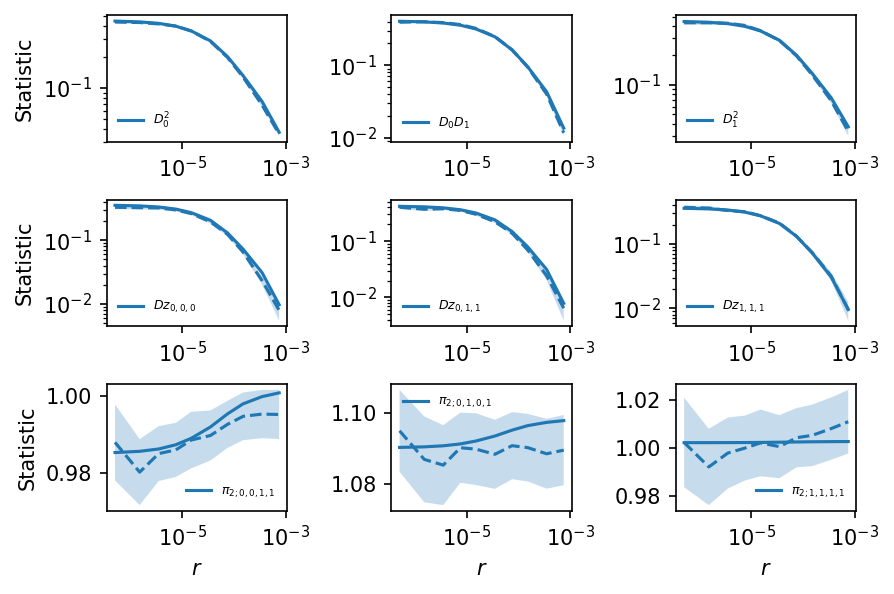

In [34]:
momentsLD_func(combined_ld_stats_path, sampled_params_path, experiment_config_filepath, sim_directory, sim_number)

In [38]:
sampled_params

{'N0': 8842,
 'N1': 7247,
 'N2': 6937,
 'm12': 0.00035523875170101043,
 'm21': 0.00029072017959594495,
 't_split': 1582}

In [39]:
with open('/sietch_colab/akapoor/Demographic_Inference/MomentsLD_inferences_test/sim_0/momentsLD_inferences_sim_0.pkl', 'rb') as f:
    momentsLD_inferences = pickle.load(f)

In [40]:
momentsLD_inferences

{'simulated_params': {'N0': 8842,
  'N1': 7247,
  'N2': 6937,
  'm12': 0.00035523875170101043,
  'm21': 0.00029072017959594495,
  't_split': 1582},
 'opt_params_momentsLD': [{'N1': 9145.586733919614,
   'N2': 3092.1291602848255,
   't_split': 91414.12612210815,
   'm12': 5.1494700458693074e-06,
   'm21': 0.001285029789880487,
   'N0': 4590.046083348746}],
 'll_all_replicates_momentsLD': [2762.180297980107]}

This was a disaster. Let's do Moments and Dadi first

## Moments / Dadi 

In [ ]:
# obtain_feature(SFS, sampled_params, experiment_config, sim_directory, sim_number, replicate_number)

In [16]:
from snakemake_scripts.obtain_single_feature import obtain_feature as obtain_feature_dadi_moments

In [17]:
SFS = f'/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/SFS_sim_{sim_number}.pkl'
replicate_number = 0
sim_directory = '/sietch_colab/akapoor/Demographic_Inference/moments_dadi_test'
sampled_params_path = f'/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/sampled_params_{sim_number}.pkl'

In [18]:
with open(SFS, 'rb') as f:
    sfs = pickle.load(f)

In [19]:
sfs

Spectrum([[-- 29810.0 8029.0 3044.0 1222.0 459.0 171.0 90.0 26.0 23.0 4.0 3.0 0.0
  0.0 0.0 0.0 0.0]
 [41351.0 7458.0 3614.0 1912.0 974.0 462.0 232.0 114.0 40.0 22.0 6.0 2.0
  4.0 2.0 0.0 0.0 0.0]
 [15574.0 4797.0 2790.0 1668.0 951.0 606.0 292.0 177.0 83.0 51.0 24.0 7.0
  4.0 4.0 2.0 0.0 0.0]
 [7903.0 3733.0 2437.0 1639.0 1082.0 617.0 407.0 241.0 114.0 74.0 22.0
  16.0 3.0 1.0 0.0 2.0 0.0]
 [4259.0 2727.0 2158.0 1504.0 1032.0 695.0 402.0 271.0 137.0 70.0 44.0
  24.0 9.0 0.0 1.0 0.0 0.0]
 [2613.0 2100.0 1699.0 1364.0 1034.0 736.0 509.0 342.0 185.0 115.0 63.0
  39.0 22.0 8.0 2.0 0.0 0.0]
 [1675.0 1510.0 1359.0 1190.0 950.0 766.0 486.0 382.0 241.0 155.0 86.0
  48.0 17.0 11.0 1.0 1.0 0.0]
 [1051.0 1138.0 1143.0 1057.0 910.0 741.0 555.0 409.0 257.0 174.0 108.0
  65.0 38.0 10.0 9.0 1.0 1.0]
 [661.0 771.0 976.0 841.0 828.0 682.0 578.0 408.0 304.0 219.0 92.0 64.0
  44.0 8.0 15.0 1.0 0.0]
 [424.0 559.0 790.0 755.0 761.0 667.0 592.0 484.0 311.0 227.0 161.0 80.0
  65.0 23.0 15.0 6.0 2.0]
 [263.0 

In [ ]:
# sfs.pop_ids = ['N1']

In [46]:
# with open(SFS, 'rb') as f:
#     sfs = pickle.load(f)

# sfs.pop_ids = ['N0']

with open(SFS, 'wb') as f:
    pickle.dump(sfs, f)

Scratch code first to debug

In [114]:
from src.parameter_inference import run_inference_dadi

In [115]:
# Arguments
    # sfs,
    # p0,
    # num_samples,
    # demographic_model,
    # lower_bound=[0.001, 0.001, 0.001, 0.001],
    # upper_bound=[1, 1, 1, 1],
    # mutation_rate=1.26e-8,
    # length=1e8,

with open(experiment_config_filepath, "r") as f:
    experiment_config = json.load(f)

p0 = experiment_config['optimization_initial_guess']
num_samples = 30
demographic_model = 'bottleneck_model'
lower_bound = experiment_config['lower_bound_optimization']
upper_bound = experiment_config['upper_bound_optimization']
mutation_rate = experiment_config['mutation_rate']
length = experiment_config['genome_length']

In [116]:
param_order = experiment_config["parameter_names"]
p0 = [experiment_config["optimization_initial_guess"][param] for param in param_order]
lower_bound = [experiment_config["lower_bound_optimization"][param] for param in param_order]
upper_bound = [experiment_config["upper_bound_optimization"][param] for param in param_order]

print(f'The guess is: {p0}')
print(f'The upper bound is: {upper_bound}')
print(f'The lower bound is: {lower_bound}')

upper_bound = list(experiment_config['upper_bound_optimization'].values())
lower_bound = list(experiment_config['lower_bound_optimization'].values())

The guess is: [10000, 1000, 15000, 3000, 2000]
The upper bound is: [30000, 30000, 30000, 40000, 20000]
The lower bound is: [1000, 100, 1000, 200, 100]


In [117]:
sfs.pop_ids

['N0']

In [118]:
from collections import OrderedDict
import src.demographic_models as demographic_models
import moments
sample_sizes_fit = OrderedDict(
    (p, (n - 1)//2) for p, n in zip(sfs.pop_ids, sfs.shape)
)
ns = sfs.sample_sizes

# print(f"lower bound: {lower_bound}")
# print(f"upper bound: {upper_bound}")

# 1) Build "mean" and "stddev" from your (scaled) bounds
# mean = [(l+u)/2 for (l, u) in zip(lower_bound, upper_bound)]
# stddev = [(u - l)/np.sqrt(12) for (l, u) in zip(lower_bound, upper_bound)]

# 2) Pick the correct dadi model in scaled space
if demographic_model == "bottleneck_model":
    model_func = demographic_models.three_epoch_fixed
elif demographic_model == "split_isolation_model":
    model_func = demographic_models.split_isolation_model_dadi
elif demographic_model == "split_migration_model":
    model_func = demographic_models.split_migration_model_dadi
else:
    raise ValueError(f"Unsupported demographic model: {demographic_model}")

# 3) Setup grids for extrapolation
pts_ext = [max(ns) + 60, max(ns) + 70, max(ns) + 80]

# 4) Perturb the initial guess to avoid local minima
p_guess = moments.Misc.perturb_params(
    p0, fold=1, lower_bound=lower_bound, upper_bound=upper_bound
)

demo_model_ex = dadi.Numerics.make_extrap_func(model_func)

In [119]:
p_guess

array([19945.18629368,   900.93192053, 24479.04680121,  2574.41468549,
        1803.53228109])

In [120]:
from src.parameter_inference import real_to_dadi_params

In [121]:
p_guess_scaled = real_to_dadi_params(p_guess, demographic_model, parameter_names=param_order)
lower_bound = real_to_dadi_params(lower_bound, demographic_model, parameter_names=param_order)
upper_bound = real_to_dadi_params(upper_bound, demographic_model, parameter_names=param_order)

print(f'p_guess_scaled: {p_guess_scaled}')
print(f'lower_bound: {lower_bound}')
print(f'upper_bound: {upper_bound}')



p_guess_scaled: {'nuB': 0.045170393861516375, 'nuF': 1.2273160270740127, 't_bottleneck_end': 0.045212219493324296}
lower_bound: {'nuB': 0.1, 'nuF': 1.0, 't_bottleneck_end': 0.05}
upper_bound: {'nuB': 1.0, 'nuF': 1.0, 't_bottleneck_end': 0.3333333333333333}


In [122]:
p_guess = list(p_guess_scaled.values())
lower_bound = list(lower_bound.values())
upper_bound = list(upper_bound.values())

In [129]:
# Calculate the synonymous theta
from src.demographic_models import set_TB_fixed
tb_dadi = (sampled_params['t_bottleneck_start'] - sampled_params['t_bottleneck_end']) / (2 * sampled_params['N0'])
set_TB_fixed(tb_dadi)

In [ ]:
import dadi
xopt = dadi.Inference.optimize_log_lbfgsb(
    p_guess,
    sfs,
    demo_model_ex,
    pts=pts_ext,
    lower_bound=lower_bound,
    upper_bound=upper_bound,
    multinom=False,
    verbose=1,
    flush_delay=0.0,
    full_output=True,
    maxiter=1000
)

opt_params_scaled = xopt[0]
ll_value = xopt[1]


81      , -5.38851e+06, array([ 0.0451704  ,  1.22732    ,  0.0452122  ])
82      , -5.388e+06  , array([ 0.0452156  ,  1.22732    ,  0.0452122  ])
83      , -5.38851e+06, array([ 0.0451704  ,  1.22854    ,  0.0452122  ])
84      , -5.38834e+06, array([ 0.0451704  ,  1.22732    ,  0.0452575  ])
85      , -4.9397e+06 , array([ 0.11658    ,  1.22609    ,  0.0621297  ])
86      , -4.93938e+06, array([ 0.116697   ,  1.22609    ,  0.0621297  ])
87      , -4.93966e+06, array([ 0.11658    ,  1.22732    ,  0.0621297  ])
88      , -4.93959e+06, array([ 0.11658    ,  1.22609    ,  0.0621919  ])
89      , -4.52609e+06, array([ 0.718338   ,  2.09796    ,  0.113458   ])
90      , -4.526e+06  , array([ 0.719056   ,  2.09796    ,  0.113458   ])
91      , -4.52604e+06, array([ 0.718338   ,  2.10006    ,  0.113458   ])
92      , -4.52604e+06, array([ 0.718338   ,  2.09796    ,  0.113571   ])
93      , -4.40022e+06, array([ 1.7872     ,  4.55249    ,  0.195013   ])
94      , -4.40018e+06, array([ 1.7889

In [132]:
opt_params_scaled

array([  55133.15005514,  101760.69405698, 2174096.38641993])

In [107]:
param_order

['N0', 'Nb', 'N_recover', 't_bottleneck_start', 't_bottleneck_end']

In [76]:
# Calculate the synonymous theta
from src.demographic_models import set_TB_fixed
tb_dadi = (sampled_params['t_bottleneck_start'] - sampled_params['t_bottleneck_end']) / (2 * sampled_params['N0'])

In [77]:
tb_dadi

0.15371723033820292

In [78]:
set_TB_fixed(tb_dadi)

In [79]:
pts_ext = [40, 50, 60]

In [80]:
opt_params_scaled

array([0.17549459, 1.14601005, 0.06366477])

In [81]:
model_fs = demo_model_ex(opt_params_scaled, ns, pts_ext)

TB_fixed: 0.15371723033820292
nuB: 0.1754945851623682, nuF: 1.1460100488218916, TF: 0.06366476968933471
TB_fixed: 0.15371723033820292
nuB: 0.1754945851623682, nuF: 1.1460100488218916, TF: 0.06366476968933471
TB_fixed: 0.15371723033820292
nuB: 0.1754945851623682, nuF: 1.1460100488218916, TF: 0.06366476968933471


In [82]:
theta0 = dadi.Inference.optimal_sfs_scaling(model_fs, sfs)

In [83]:
theta0

180933.02659048035

In [85]:
N0_est = theta0 / (4*mutation_rate*length)

In [86]:
opt_params_scaled

array([0.17549459, 1.14601005, 0.06366477])

In [87]:
nb_est = opt_params_scaled[0] * N0_est
nr_est = opt_params_scaled[1] * N0_est
tb_est = opt_params_scaled[2] * 2* N0_est

In [90]:
print(f'N0 estimated: {N0_est}')
print(f'N_b estimated: {nb_est}')
print(f'N_r estimated: {nr_est}')
print(f't_b estimated: {tb_est}')

N0 estimated: 30155.50443174673
N_b estimated: 5292.127740611349
N_r estimated: 34558.51110607484
t_b estimated: 3839.686489025735


In [89]:
sampled_params

{'N0': 19988,
 'Nb': 16790,
 'N_recover': 14904,
 't_bottleneck_start': 18779,
 't_bottleneck_end': 12634}

In [22]:
obtain_feature_dadi_moments(SFS, sampled_params_path, experiment_config_filepath, sim_directory, sim_number, replicate_number)

The simulation directory is: /sietch_colab/akapoor/Demographic_Inference/moments_dadi_test
The dadi dir is /sietch_colab/akapoor/Demographic_Inference/moments_dadi_test/sim_0/dadi/replicate_0
The moments dir is /sietch_colab/akapoor/Demographic_Inference/moments_dadi_test/sim_0/moments/replicate_0
The guess is: [9200, 6700, 5500, 0.00015, 0.0002, 1800]
The upper bound is: [10000, 8000, 8000, 0.0005, 0.0005, 2000]
The lower bound is: [8000, 5000, 5000, 0.0001, 0.0001, 1500]


Lower bound: [8000, 5000, 5000, 0.0001, 0.0001, 1500]
Upper bound: [10000, 8000, 8000, 0.0005, 0.0005, 2000]
1       , -5272.01    , array([ 9900       ,  7920       ,  7920       ,  0.000101   ,  0.000383885,  1980       ])
2       , -5272.01    , array([ 9900       ,  7920       ,  7920       ,  0.000101   ,  0.000383885,  1980       ])
7       , -3709.23    , array([ 8797.79    ,  7920       ,  7920       ,  0.000101   ,  0.000383885,  1980       ])
8       , -4201.88    , array([ 9332.52    ,  7920       ,  7920       ,  0.000101   ,  0.000383885,  1980       ])
9       , -3665.76    , array([ 8615.96    ,  7920       ,  7920       ,  0.000101   ,  0.000383885,  1980       ])
10      , -3664.96    , array([ 8591.65    ,  7920       ,  7920       ,  0.000101   ,  0.000383885,  1980       ])
11      , -3665.01    , array([ 8579.48    ,  7920       ,  7920       ,  0.000101   ,  0.000383885,  1980       ])
12      , -3664.96    , array([ 8591.65    ,  7920       ,  7920       ,  0.000

In [23]:
sampled_params

{'N0': 8842,
 'N1': 7247,
 'N2': 6937,
 'm12': 0.00035523875170101043,
 'm21': 0.00029072017959594495,
 't_split': 1582}

In [24]:
with open('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_test/sim_0/dadi/replicate_0/replicate_0.pkl', 'rb') as f:
    dadi_moments_inference = pickle.load(f)

In [26]:
dadi_moments_inference['opt_params_dadi']

{'N0': 8843.251011612985,
 'N1': 7421.418790942374,
 'N2': 6902.04195980303,
 't_split': 1532.7929521672202,
 'm12': 0.00038693133849264046,
 'm21': 0.0002641338565922427,
 'll': 2127.038824253381}

In [27]:
with open('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_test/sim_0/moments/replicate_0/replicate_0.pkl', 'rb') as f:
    moments_inference = pickle.load(f)

In [29]:
moments_inference['opt_params_moments']

{'N0': 8829.882052649778,
 'N1': 7537.901080793105,
 'N2': 6968.0898052112825,
 't_split': 1500.000000001808,
 'm12': 0.00038380188400863693,
 'm21': 0.0002448252685844989,
 'll': 2125.123079526811,
 'upper_triangular_FIM': array([ 2.47910343e-04,  2.42694586e-04,  2.84694483e+03, -1.20959182e+04,
         1.01415580e-03,  4.89117084e-04, -1.28087212e+04,  4.23089116e+03,
        -1.69853691e-03, -1.40674682e+11, -3.86546188e+11,  2.59339790e+04,
        -1.78683928e+11, -1.64841284e+04, -1.60239223e-01])}

### Side quest: debugging the SFS from demes 

In [14]:
import src.demographic_models as demographic_models
demo_func = demographic_models.split_migration_model_simulation

In [15]:
with open(f'/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/sampled_params_{sim_number}.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [16]:
demes_graph = demo_func(sampled_params)  # e.g. returns a demes.Graph


In [17]:
demes_graph

Graph(description='', time_units='generations', generation_time=1, doi=[], metadata={}, demes=[Deme(name='N0', description='', start_time=inf, ancestors=[], proportions=[], epochs=[Epoch(start_time=inf, end_time=1601, start_size=8814, end_size=8814, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='N1', description='', start_time=1601, ancestors=['N0'], proportions=[1.0], epochs=[Epoch(start_time=1601, end_time=0, start_size=5495, end_size=5495, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='N2', description='', start_time=1601, ancestors=['N0'], proportions=[1.0], epochs=[Epoch(start_time=1601, end_time=0, start_size=7200, end_size=7200, size_function='constant', selfing_rate=0, cloning_rate=0)])], migrations=[AsymmetricMigration(source='N1', dest='N2', start_time=1601, end_time=0, rate=0.0002310042021855942), AsymmetricMigration(source='N2', dest='N1', start_time=1601, end_time=0, rate=0.00026990481212614244)], pulses=[])

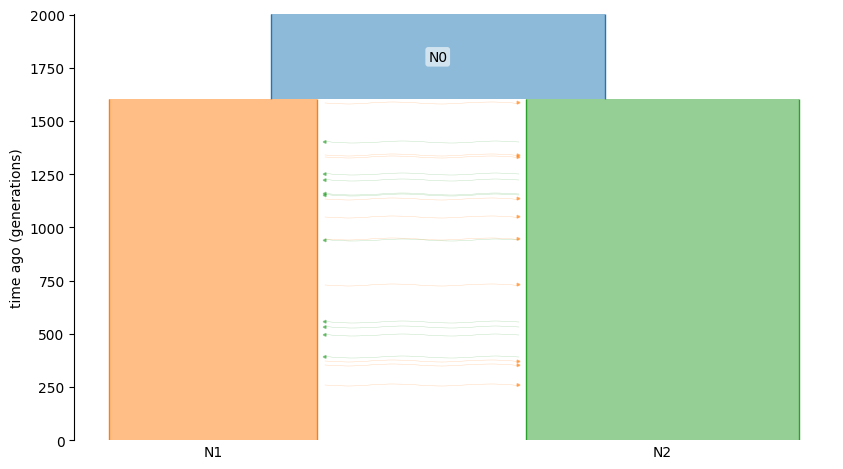

In [18]:
import demes, demesdraw
ax = demesdraw.tubes(demes_graph)

In [28]:
import moments
with open(experiment_config_filepath, 'r') as f:
    experiment_config = json.load(f)


r_bins = np.array([0, 1e-6, 2e-6, 5e-6, 1e-5, 2e-5, 5e-5, 1e-4, 2e-4, 5e-4, 1e-3])

y = moments.LD.LDstats.from_demes(
    demes_graph, sampled_demes=['N1', 'N2'], r = r_bins, theta = 4*sampled_params['N0']*experiment_config['mutation_rate']
)

In [29]:
y

LDstats([[3.86806717e-08 3.42856857e-08 3.88463345e-08 3.14210637e-08
  2.48765771e-08 3.64042857e-08 3.98233421e-08 2.63358140e-08
  3.12520898e-08 8.35088147e-08 8.84592767e-08 8.29918112e-08
  9.50860639e-08 8.99026450e-08 8.61349820e-08]
 [3.78666301e-08 3.34841554e-08 3.80081645e-08 3.06520710e-08
  2.42292368e-08 3.54820328e-08 3.88216569e-08 2.56503900e-08
  3.04730618e-08 8.31234968e-08 8.80746338e-08 8.26508135e-08
  9.46709422e-08 8.95166011e-08 8.57485150e-08]
 [3.70873623e-08 3.27169906e-08 3.72058342e-08 2.99165361e-08
  2.36102556e-08 3.46000155e-08 3.78636238e-08 2.49949948e-08
  2.97279878e-08 8.27549632e-08 8.77067505e-08 8.23246718e-08
  9.42739058e-08 8.91473776e-08 8.53788846e-08]
 [3.49372137e-08 3.06009500e-08 3.49922515e-08 2.78904343e-08
  2.19062904e-08 3.21710248e-08 3.52250205e-08 2.31907954e-08
  2.76759397e-08 8.17399109e-08 8.66935162e-08 8.14263918e-08
  9.31803631e-08 8.81304495e-08 8.43608240e-08]
 [3.18762482e-08 2.75907146e-08 3.18415876e-08 2.5016021

In [177]:
sample_sizes = [30, 16] # 2*sample_sizes
pts_l = [20, 30, 40]

In [178]:
# 4) Evaluate on the extrapolation grid
#    For a 2D model, sample_sizes might be [n1, n2]. For 1D, [n]. For 3D, etc.
# ns = [2 * n for n in sample_sizes.values()]  # e.g., [30, 16] if input is [15, 8]

import dadi 
model_fs_dadi = dadi.Spectrum.from_demes(
    demes_graph,
    # sampled_demes = list(sample_sizes.keys()),
    sampled_demes = ['N1', 'N2'],
    sample_sizes = sample_sizes,
    pts = pts_l
)

In [179]:
import moments
model_fs_moments = moments.Spectrum.from_demes(
    demes_graph,
    # sampled_demes = list(sample_sizes.keys()),
    sampled_demes = ['N1', 'N2'],
    sample_sizes = sample_sizes
)

In [180]:
model_fs_dadi

Spectrum([[-- 0.5446262655982381 0.16048644840447945 0.06119221295310184
  0.025473156998556123 0.010955433836296581 0.00475121218084586
  0.0020448251589328375 0.0008579470774637069 0.00034557809320911537
  0.00013281162705708945 4.84700276395211e-05 1.644034409168811e-05
  4.9621856690378e-06 1.2630994888153383e-06 2.519373760639583e-07
  3.165743107473801e-08]
 [0.7999317047287464 0.12072937654394056 0.0665296586576355
  0.037813286398017204 0.02118161210093618 0.011586551059760919
  0.0061548572009562895 0.0031489478505197788 0.0015396009976352777
  0.0007170691922273823 0.00031733143622846493 0.00013183300637814469
  5.0101460727095405e-05 1.684267704766629e-05 4.817423856536733e-06
  1.0902747183526727e-06 1.5655114676712083e-07]
 [0.31766737671505996 0.07715882615799441 0.048750202179587226
  0.03161604350345412 0.020045828758348108 0.012309089617545864
  0.0072764129151031 0.004116767232156968 0.0022220422884368096
  0.0011425034811215259 0.0005562748866095447 0.000252560635805

In [181]:
model_fs_moments

Spectrum([[-- 0.5495083686736477 0.1618163691358826 0.0617168645609266
  0.025731593922329248 0.011092920914318663 0.004818654410843632
  0.0020688564295037685 0.0009227363852253739 0.00039558737516591627
  0.0001614024864506238 6.183687700685403e-05 2.1826569791119798e-05
  6.894455149421614e-06 1.850684731392126e-06 3.5229232315721693e-07
  4.221237352192691e-08]
 [0.8092912392648293 0.1238434147311019 0.06788808224598226
  0.038520498798670505 0.02159037564461339 0.011819942422414919
  0.006275893644368276 0.0032454746164035423 0.0016247588433564147
  0.0007804420584058226 0.0003558241298552902 0.0001519477642513259
  5.966911288669787e-05 2.0953674503632903e-05 6.2616491688866275e-06
  1.3798250107010549e-06 1.887802815673973e-07]
 [0.32181443038812013 0.07859597772682941 0.04954795115954244
  0.032113981589035466 0.02036493852519857 0.01250460572959619
  0.00741248554169008 0.004233380095023948 0.0023119819333866105
  0.0012073890561264426 0.000597158695282999 0.000276296611203114

In [182]:
# Let's look at the empirical SFS 
with open(SFS, 'rb') as f:
    sfs = pickle.load(f)

In [183]:
sfs.shape

(31, 17)

In [184]:
model_fs_dadi.shape

(31, 17)

In [185]:
with open(experiment_config_filepath, 'r') as f:
    experiment_config = json.load(f)

In [186]:
def norm(p, mean, stddev):
    return [(x - m) / s for x, m, s in zip(p, mean, stddev)]


def unnorm(z, mean, stddev):
    return [z_i * s + m for z_i, m, s in zip(z, mean, stddev)]

In [187]:
p_guess = [6000,
        7000,
        0.0002,
        0.0002,
        1650 
]

In [188]:
# Extract lower and upper bounds
# Take the dictionary and create a list of the values

lb = list(experiment_config['lower_bound_params'].values())[1:] # getting rid of Nref since it will be optimized automatically 
ub = list(experiment_config['upper_bound_params'].values())[1:] # getting rid of Nref since it will be optimized automatically

print(f'lower bound: {lb}')
print(f'upper bound: {ub}')

# Compute mean and standard deviation using zip
mean = [(l + u) / 2 for l, u in zip(lb, ub)]
stddev = [(u - l) / np.sqrt(12) for l, u in zip(lb, ub)]

lower bound: [5000, 6000, 0.0001, 0.0001, 1500]
upper bound: [7000, 8000, 0.0005, 0.0005, 2000]


In [189]:
pts_ext = [20, 30, 40]

In [190]:
from src.parameter_inference import diffusion_sfs_dadi

In [199]:
import nlopt
opt_params, ll_value = dadi.Inference.opt(
    norm(p_guess, mean, stddev),  # Pass mean and stddev
    sfs,
    lambda z, n, pts: diffusion_sfs_dadi(
        unnorm(z, mean, stddev),  # Convert normalized parameters
        experiment_config['num_samples'],  # Population sample sizes
        "split_migration_model",  # Ensure this is passed
        experiment_config['mutation_rate'],  # Ensure this is passed
        experiment_config['genome_length'],  # Ensure this is passed
        pts  # Already included
    ),
    pts=pts_ext,
    lower_bound=norm(lb, mean, stddev),  # Pass mean and stddev
    upper_bound=norm(ub, mean, stddev),  # Pass mean and stddev
    algorithm=nlopt.LN_BOBYQA,
    maxeval=400,
    verbose=1
)

fitted_params = unnorm(opt_params, mean, stddev)

1098    , -4317.52    , array([ 0          ,  0          , -0.866025   , -0.866025   , -0.69282    ])


1099    , -3547.82    , array([ 0.866025   ,  0          , -0.866025   , -0.866025   , -0.69282    ])
1100    , -4177.17    , array([ 0          ,  0.866025   , -0.866025   , -0.866025   , -0.69282    ])
1101    , -3900.94    , array([ 0          ,  0          , -1.11022e-16, -0.866025   , -0.69282    ])
1102    , -3123.6     , array([ 0          ,  0          , -0.866025   , -1.11022e-16, -0.69282    ])
1103    , -4579.77    , array([ 0          ,  0          , -0.866025   , -0.866025   ,  0.173205   ])
1104    , -5404.07    , array([-0.866025   ,  0          , -0.866025   , -0.866025   , -0.69282    ])
1105    , -4562.25    , array([ 0          , -0.866025   , -0.866025   , -0.866025   , -0.69282    ])
1106    , -5638.57    , array([ 0          ,  0          , -1.73205    , -0.866025   , -0.69282    ])
1107    , -7008.26    , array([ 0          ,  0          , -0.866025   , -1.73205    , -0.69282    ])
1108    , -4059.7     , array([ 0          ,  0          , -0.866025   , -0.866025

In [196]:
fitted_params

[7000.0, 8000.0, 0.00015853197967519167, 0.00035899997221912556, 2000.0]

In [197]:
sampled_params

{'N0': 8088,
 'N1': 6508,
 'N2': 6727,
 'm12': 0.00013082384210838397,
 'm21': 0.0003393876660249361,
 't_split': 1569}

### Side Quest -- Debugging dadi

In [126]:
with open(experiment_config_filepath, 'r') as f:
    experiment_config = json.load(f)

In [127]:
p_guess = experiment_config['optimization_initial_guess']

In [128]:
p_guess

[6000, 7000, 0.0002, 0.0002, 1650]

In [129]:
p_guess_opt = list(real_to_dadi_params(p_guess))

In [132]:
lower_bound

{'N0': 8000,
 'N1': 5000,
 'N2': 6000,
 'm12': 0.0001,
 'm21': 0.0001,
 't_split': 1500}

In [133]:
lower_bound = experiment_config['lower_bound_params']
upper_bound = experiment_config['upper_bound_params']

lower_bound_opt = list(real_to_dadi_params(list(lower_bound.values())[1:]))
upper_bound_opt = list(real_to_dadi_params(list(upper_bound.values())[1:]))

print(lower_bound_opt)
print(upper_bound_opt)

[0.5, 0.6, 2.0, 2.0, 0.075]
[0.7, 0.8, 10.0, 10.0, 0.1]


In [134]:
from src.demographic_models import split_migration_model_dadi
model_func = split_migration_model_dadi

In [135]:
pts_ext

[30, 40, 50]

In [137]:
with open('/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/SFS_sim_0.pkl', 'rb') as f:
    sfs = pickle.load(f)

In [138]:
sfs

Spectrum([[-- 28092.0 7758.0 2874.0 1195.0 456.0 211.0 75.0 50.0 13.0 11.0 3.0 0.0
  0.0 0.0 0.0 0.0]
 [39743.0 6503.0 3240.0 1942.0 999.0 509.0 280.0 165.0 69.0 20.0 14.0 5.0
  0.0 0.0 2.0 0.0 0.0]
 [15438.0 4213.0 2602.0 1705.0 1073.0 642.0 368.0 184.0 120.0 55.0 18.0
  9.0 2.0 0.0 0.0 0.0 0.0]
 [7741.0 2923.0 2026.0 1477.0 956.0 676.0 412.0 218.0 129.0 54.0 43.0
  14.0 3.0 1.0 0.0 0.0 0.0]
 [4537.0 2213.0 1630.0 1245.0 829.0 691.0 451.0 260.0 134.0 89.0 35.0
  13.0 23.0 0.0 1.0 1.0 0.0]
 [2838.0 1834.0 1372.0 1153.0 895.0 675.0 519.0 363.0 180.0 144.0 95.0
  28.0 12.0 6.0 7.0 0.0 0.0]
 [1849.0 1365.0 1120.0 956.0 793.0 685.0 481.0 335.0 237.0 161.0 89.0
  44.0 17.0 15.0 10.0 0.0 0.0]
 [1069.0 1028.0 1035.0 905.0 765.0 605.0 518.0 388.0 307.0 178.0 125.0
  70.0 43.0 18.0 2.0 1.0 0.0]
 [775.0 741.0 816.0 793.0 797.0 672.0 454.0 360.0 303.0 170.0 115.0 77.0
  58.0 18.0 11.0 4.0 1.0]
 [461.0 541.0 576.0 629.0 567.0 582.0 512.0 428.0 346.0 216.0 142.0 102.0
  56.0 29.0 15.0 16.0 0.0]
 [2

In [139]:
lower_bound_opt

[0.5, 0.6, 2.0, 2.0, 0.075]

In [144]:
opt_params, ll_value = dadi.Inference.opt(
    p_guess_opt,
    sfs,
    model_func,
    lower_bound=lower_bound_opt,
    upper_bound=upper_bound_opt,
    pts=40,
    algorithm=nlopt.LN_BOBYQA,
    verbose=1
)

414     , -4288.61    , array([ 0.6        ,  0.7        ,  4          ,  4          ,  0.0825     ])
415     , -3536.79    , array([ 0.65       ,  0.7        ,  4          ,  4          ,  0.0825     ])
416     , -4150.06    , array([ 0.6        ,  0.75       ,  4          ,  4          ,  0.0825     ])
417     , -2982.33    , array([ 0.6        ,  0.7        ,  6          ,  4          ,  0.0825     ])
418     , -3703.99    , array([ 0.6        ,  0.7        ,  4          ,  6          ,  0.0825     ])
419     , -4569.57    , array([ 0.6        ,  0.7        ,  4          ,  4          ,  0.08875    ])
420     , -5348.99    , array([ 0.55       ,  0.7        ,  4          ,  4          ,  0.0825     ])
421     , -4528.87    , array([ 0.6        ,  0.65       ,  4          ,  4          ,  0.0825     ])
422     , -7038.46    , array([ 0.6        ,  0.7        ,  2          ,  4          ,  0.0825     ])
423     , -5756.09    , array([ 0.6        ,  0.7        ,  4          ,  2       

In [141]:
opt_params

array([0.7       , 0.8       , 7.61982933, 3.19247974, 0.1       ])

In [142]:
real_to_dadi_params(list(sampled_params.values())[1:])

(0.6508, 0.6727, 2.616476842167679, 6.787753320498722, 0.07845)

In [ ]:
sfs

In [99]:
import moments
with open('/sietch_colab/akapoor/Demographic_Inference/experiment_config.json', 'r') as f:
    experiment_config = json.load(f)
    
p0 = experiment_config['optimization_initial_guess']
upper_bound = experiment_config['upper_bound_optimization']
lower_bound = experiment_config['lower_bound_optimization']

p_guess = moments.Misc.perturb_params(
    p0, fold=1, lower_bound=lower_bound, upper_bound=upper_bound
)

In [ ]:
p_guess

In [103]:
import src.demographic_models as demographic_models

model_func = demographic_models.split_migration_model_moments

with open('/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/SFS_sim_0.pkl', 'rb') as f:
    sfs = pickle.load(f)

In [ ]:
xopt = moments.Inference.optimize_powell(
    p_guess,
    sfs,
    model_func,
    lower_bound=lower_bound,
    upper_bound=upper_bound,
    verbose=20,
    full_output=True
)

In [ ]:
xopt

In [111]:
import numpy as np
import nlopt
import demes
import moments

def diffusion_sfs(sampled_params, sample_sizes, sequence_length, mutation_rate) -> moments.Spectrum:
    """
    Get expected SFS under diffusion approximation using the bottleneck demographic model.
    
    Args:
        sampled_params (dict): Dictionary of sampled demographic parameters.
        sample_sizes (dict): Dictionary mapping population names to sample sizes.
        sequence_length (float): The length of the sequence being analyzed.
        mutation_rate (float): The per-base mutation rate.

    Returns:
        moments.Spectrum: Expected site frequency spectrum under diffusion approximation.
    """
    # Generate demographic model from sampled parameters
    demography = demographic_models.split_migration_model_simulation(sampled_params)

    # Extract sampled populations and sample sizes
    sampled_demes = list(sample_sizes.keys())
    sample_sizes = [n * 2 for n in sample_sizes.values()]  # Convert haploid sample sizes to diploid

    # Use demography directly since it's a demes.Graph object
    return moments.Spectrum.from_demes(
        demography,  # This is already a `demes.Graph`
        sample_sizes=sample_sizes,
        sampled_demes=sampled_demes,
        theta=sampled_params['N0'] * sequence_length * mutation_rate * 4,
    )

# demo
sample_sizes = {"N1": 15, "N2": 15}
sequence_length = 1e6
mutation_rate = 1e-8
true_params = sampled_params.copy()

# litmus test: use expected sfs as observed data
obs_sfs = diffusion_sfs(
	true_params, 
	sample_sizes, 
	sequence_length, 
	mutation_rate,
)

In [ ]:
obs_sfs

In [ ]:
params_start = true_params.copy()

def objective(params, grad):
	assert grad.size == 0
	fit_sfs = diffusion_sfs(
		params, 
		sample_sizes, 
		sequence_length, 
		mutation_rate,
	)
	poisson_logpmf = np.log(fit_sfs) * obs_sfs - fit_sfs
	return -poisson_logpmf


# set up bobyqa
optimizer = nlopt.opt(nlopt.LN_BOBYQA, 5)
optimizer.set_lower_bounds([0] * 5)
optimizer.set_upper_bounds([np.inf] * 5)
optimizer.set_min_objective(objective)
fit_params = optimizer.optimize(params_start)
print(
	"true_params:", true_params, "\n",
	"fitted params:", fit_params, "\n",
	"logl:", optimizer.last_optimum_value(), "\n",
	"return code:", opt.last_optimize_result(), "\n",
)

In [ ]:
import numpy as np
import moments
import msprime
import tskit
import demes  # <-- important to import demes
from collections import OrderedDict

###############################################################################
# 1. Define your new demes-based model (replacing the old demographic_model)
###############################################################################
def split_migration_model_simulation(sampled_params):
    """
    Build a demes Graph for the split-migration scenario using the
    parameters in sampled_params.

    Returns
    -------
    demes.Graph
    """
    # Unpack the sampled parameters
    N0, N1, N2, m12, m21, t_split = (
        sampled_params["N0"],
        sampled_params["N1"],
        sampled_params["N2"],
        sampled_params["m12"],
        sampled_params["m21"],
        sampled_params["t_split"],
    )

    b = demes.Builder()

    # The ancestral population lives until t_split
    b.add_deme(
        "N0",
        epochs=[
            dict(start_size=N0, end_time=t_split),
        ],
    )

    # After t_split, two daughter demes (N1, N2):
    b.add_deme("N1", ancestors=["N0"], epochs=[dict(start_size=N1)])
    b.add_deme("N2", ancestors=["N0"], epochs=[dict(start_size=N2)])

    # Asymmetric migration between N1 and N2
    b.add_migration(source="N1", dest="N2", rate=m12)
    b.add_migration(source="N2", dest="N1", rate=m21)

    # Build and return the resolved graph
    return b.resolve()

###############################################################################
# 2. Sample parameters, sample_sizes, and global constants
###############################################################################
# Example of user-provided parameters:
sampled_params = {
    "N0": 8310,
    "N1": 6547,
    "N2": 7503,
    "m12": 0.024311099707756734,
    "m21": 0.05239864146767862,
    "t_split": 1937
}

# If your code needs a list of parameters in a specific order,
# you can still construct it:
param_list = [
    sampled_params["N0"],
    sampled_params["N1"],
    sampled_params["N2"],
    sampled_params["m12"],
    sampled_params["m21"],
    sampled_params["t_split"],
]

# Example sample sizes in *diploid* individuals per population.
# The code multiplies by 2 (haploid) internally.
sample_sizes = OrderedDict([
    ("N1", 15),
    ("N2", 8),
])

with open(experiment_config_filepath, "r") as f:
    experiment_config = json.load(f)

sequence_length = experiment_config['genome_length']
mutation_rate = experiment_config['mutation_rate']
global_seed = 42

###############################################################################
# 3. Placeholder for sample_parameters() if your code references it
###############################################################################
def sample_parameters(seed):
    """
    Example placeholder: in your real code, this might return (dict_of_params, dict_of_bounds).
    We'll return empty placeholders here just to avoid errors.
    """
    return {}, {}

###############################################################################
# 4. Functions to build SFS
###############################################################################
def empirical_sfs(ts: tskit.TreeSequence, sample_sizes: OrderedDict) -> moments.Spectrum:
    """
    Get empirical site frequency spectrum from a simulated (or real) TreeSequence.
    """
    sampled_demes = list(sample_sizes.keys())
    # Multiply by 2 to get haploid samples
    haploid_sample_sizes = [n * 2 for n in sample_sizes.values()]

    # Map population name -> population ID
    population_id = {p.metadata["name"]: p.id for p in ts.populations()}
    nodes_population = ts.nodes_population[ts.samples()]

    # Build sample_sets for the AFS
    sample_sets = [
        np.flatnonzero(nodes_population == population_id[deme])[:size]
        for deme, size in zip(sampled_demes, haploid_sample_sizes)
    ]

    sfs = ts.allele_frequency_spectrum(
        sample_sets,
        polarised=True,
        span_normalise=False,
    )
    return moments.Spectrum(sfs, pop_ids=sampled_demes)


def diffusion_sfs(parameters: list[float], sample_sizes: OrderedDict) -> moments.Spectrum:
    """
    Get the expected SFS under the diffusion approximation (moments).
    """
    # 1) Convert our parameter list into a dictionary
    param_dict = {
        "N0": parameters[0],
        "N1": parameters[1],
        "N2": parameters[2],
        "m12": parameters[3],
        "m21": parameters[4],
        "t_split": parameters[5],
    }

    # 2) Build the demes graph
    demes_graph = split_migration_model_simulation(param_dict)

    # 3) Construct the Spectrum via from_demes
    sampled_demes = list(sample_sizes.keys())
    haploid_sample_sizes = [n * 2 for n in sample_sizes.values()]

    # Typically, you'd set theta = 4 * Nref * mu * L for a given reference size Nref,
    # but here we just use the first population's size as "N0".
    # Adjust to your model's convention for Nref if needed.
    Nref = parameters[0]  # or define some other reference population size
    theta = 4 * Nref * mutation_rate * sequence_length

    sfs = moments.Spectrum.from_demes(
        demes_graph,
        sample_sizes=haploid_sample_sizes,
        sampled_demes=sampled_demes,
        theta=theta,
    )
    return sfs


def simulated_sfs(parameters: list[float], sample_sizes: OrderedDict, num_sims: int = 100) -> moments.Spectrum:
    """
    Get expected SFS under the coalescent by simulation (msprime).
    """
    # 1) Convert parameters to a dictionary
    param_dict = {
        "N0": parameters[0],
        "N1": parameters[1],
        "N2": parameters[2],
        "m12": parameters[3],
        "m21": parameters[4],
        "t_split": parameters[5],
    }

    # 2) Build the demes graph and convert to msprime Demography
    demes_graph = split_migration_model_simulation(param_dict)
    demography = msprime.Demography.from_demes(demes_graph)

    # 3) Simulate
    haploid_sample_sizes = [
    msprime.SampleSet(num_samples=n * 2, population=pop_name)
    for pop_name, n in sample_sizes.items()
]

    exp_sfs = None

    ts_generator = msprime.sim_ancestry(
        samples=haploid_sample_sizes,
        demography=demography,
        recombination_rate=experiment_config['recombination_rate'],
        sequence_length=sequence_length,
        num_replicates=num_sims,
        random_seed=global_seed,
    )

    # 4) For each replicate, add mutations and compute the SFS
    for ts in ts_generator:
        ts = msprime.sim_mutations(ts, mutation_rate, random_seed=global_seed)
        this_sfs = empirical_sfs(ts, sample_sizes)
        exp_sfs = this_sfs if exp_sfs is None else exp_sfs + this_sfs
        print("ITERATION COMPLETE")

    return exp_sfs / num_sims

###############################################################################
# 5. Optional: function to compare diffusion SFS vs coalescent SFS
###############################################################################
def check_model_equivalence(output_path: str, sample_sizes: OrderedDict):
    """
    Sanity-check equivalence between msprime simulations and diffusion approx.
    Produces a scatter plot of the SFS values on a log-log scale.
    """
    import matplotlib.pyplot as plt

    # We'll just reuse the global param_list for demonstration.
    sfs_sim = simulated_sfs(param_list, sample_sizes, num_sims=10)  # fewer sims for speed
    sfs_dif = diffusion_sfs(param_list, sample_sizes)

    assert sfs_dif.shape == sfs_sim.shape, "SFS shapes do not match!"

    # Flatten, ignoring the first and last entries (monomorphic categories)
    sfs_sim_flat = sfs_sim.data.flatten()
    sfs_sim_flat[0] = np.nan
    sfs_sim_flat[-1] = np.nan

    sfs_dif_flat = sfs_dif.data.flatten()
    sfs_dif_flat[0] = np.nan
    sfs_dif_flat[-1] = np.nan

    x = np.nanmedian(sfs_dif_flat)

    plt.scatter(sfs_dif_flat, sfs_sim_flat, c="black", s=6)
    plt.axline((x, x), slope=1, c="red", ls="--")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("SFS (diffusion approx)")
    plt.ylabel("SFS (coalescent simulation)")
    plt.savefig(output_path)
    plt.clf()

###############################################################################
# 6. Optional: function to fit model parameters to data
###############################################################################
def fit_model(sfs: moments.Spectrum, start: list[float] = None) -> list[float]:
    """
    Fit demographic model to provided SFS using moments.
    """
    # Recompute sample sizes from the SFS shape.
    sample_sizes_fit = OrderedDict((p, (n - 1) // 2)
                                   for p, n in zip(sfs.pop_ids, sfs.shape))

    # Suppose sample_parameters(None) returns uniform bounds.
    # For demonstration, define them manually here:
    _, _ = sample_parameters(None)  # ignoring
    dummy_bounds = {
        "N0": (8000, 10000),
        "N1": (5000, 7000),
        "N2": (6000, 8000),
        "m12": (0.01, 0.05),
        "m21": (0.01, 1e-1),
        "t_split": (1500, 2000),
    }

    # Convert bounds to lists
    lb = [bound[0] for bound in dummy_bounds.values()]
    ub = [bound[1] for bound in dummy_bounds.values()]

    mean = [(a + b) / 2 for a, b in dummy_bounds.values()]
    stddev = [(b - a) / np.sqrt(12) for a, b in dummy_bounds.values()]

    if start is None:
        start = mean  # initial guess

    def norm(p):
        return [(x - m) / s for x, m, s in zip(p, mean, stddev)]

    def unnorm(z):
        return [z_i * s + m for z_i, m, s in zip(z, mean, stddev)]

    # The function that moments will try to match
    def moments_model_func(z, ns):
        """
        Convert normalized parameters to actual parameters and compute
        the diffusion SFS.
        """
        params_unnorm = unnorm(z)
        return diffusion_sfs(params_unnorm, sample_sizes_fit)

    
    # Now perturb the start 
    # p_guess = moments.Misc.perturb_params(
    #     start, fold=1, lower_bound=lb, upper_bound=ub
    # )
    
    # Optimize using Powell
    fit = moments.Inference.optimize_powell(
        norm(start),
        sfs,
        lambda z, n: diffusion_sfs(unnorm(z), sample_sizes_fit),
        lower_bound=norm(lb),
        upper_bound=norm(ub),
        multinom=False,
        verbose=20,
        flush_delay=0.0,
    )
    return unnorm(fit)

###############################################################################
# 7. Demonstration in a main guard
###############################################################################
if __name__ == "__main__":
    # Example usage:

    # A) Diffusion SFS:
    # sfs_diff = diffusion_sfs(param_list, sample_sizes)
    # print("Diffusion SFS:", sfs_diff)

    # # B) Coalescent simulation SFS (msprime):
    # #    Using fewer replicates for a quick demonstration.
    # sfs_sim = simulated_sfs(param_list, sample_sizes, num_sims=5)
    # # print("Simulated SFS:", sfs_sim)

    # # C) Check equivalence between the two (creates a plot)
    # check_model_equivalence("model_equivalence.png", sample_sizes)
    # print("Saved equivalence plot to 'model_equivalence.png'")

    # D) Fit the model to the simulated SFS (just as an example)
    # fitted_params = fit_model(sfs_diff, start=param_list)

    # with open('/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/SFS_sim_0.pkl', 'rb') as f:
    #     SFS = pickle.load(f)

    # SFS.pop_ids = ['N1', 'N2']

    # load tree sequence
    ts = tskit.load('/sietch_colab/akapoor/Demographic_Inference/sims/simulation_results/ts_sim_0.trees')
    SFS = empirical_sfs(ts, sample_sizes)
    # print("Empirical SFS:", SFS)

    # print(f'Number of segregating sites for the diffusion SFS: {sfs_diff.S()}')
    print(f'Number of segregating sites for the empirical SFS: {SFS.S()}')
        
    empirical_fit = fit_model(SFS, start = param_list)
    print("Fitted Parameters from empirical:", empirical_fit)
    # diffusion_fit = fit_model(sfs_diff, start = param_list)
    # print("Fitted Parameters from diffusion:", diffusion_fit)


In [ ]:
sampled_params

In [ ]:
SFS

In [ ]:
sfs_diff